# Functions

Why Functions?

• Data structures tie related values into one object.

• Functions tie related commands into one object.

• Both cases: easier to understand, work with, and to build into larger structures.

In [1]:
# A Function to Check for Significance at α = 0.05
# Input p should be a single p-value in [0, 1].

significant <- function(p){
    ifelse(p < 0.05, return("significant"), return("not significant"))
}

In [2]:
# A "Robust" Loss Function (for Outlier-Resistant Regression)

# 输入: 数字构成的vector x。
# 输出: 根据x中个元素的值所决定的一个loss vector。以x^2与1作为标准，小于等于1则返回x^2,
# 比1大则返回2|x|-1。

res_loss <- function(x) {
    loss_vec <- ifelse(x^2 > 1, 2*abs(x) - 1, x^2)
    return(loss_vec)
}

vec <- c(-0.5, 0.9, -3, 4)
res_loss(vec)

[1] 0.25 0.81 5.00 7.00

## Task
Write a function called FiveTimesSum that takes as input a vector of numerical values and returns 5 times the sum of those values. Test it on the vector 1:3. Your output should be 30.

In [3]:
FiveTimesSum <- function(vec){
    return(5*sum(vec))
}

FiveTimesSum(1:3)

[1] 30

## Loss function:= f(u) = $\mathbf{u}^{\mathbf{2}}$
Least squares, makes $Q(b_{0}, b_{1}) = \sum\limits_{i=1}^{n}(y_{i}-(b_{0}+b_{1}x_{i}))^{2}$


In [4]:
Loss <- function(x, y){
    x_mean <- mean(x)
    y_mean <- mean(y)
    b1 <- sum((x - x_mean)*(y - y_mean)) / sum((x - x_mean)^2)
    b0 <- y_mean - b1*x_mean
    Q <- sum((y - (b0 + b1*x))^2)
    return(Q)
}


# Named and Default Arguments

In [5]:
# 此函数有两个输入值，其中c已经设置了默认值1。
res_loss2 <- function(x, c = 1){
    loss_vec <- ifelse(x^2 > c, 2*sqrt(c)*abs(x) - c, x^2)
    return(loss_vec)
}

In [6]:
# 用identical()函数检验，identical()函数是检验两个input是否相等的安全方法，返回布尔值。
identical(res_loss(vec), res_loss2(vec, c=1))
identical(res_loss(vec), res_loss2(vec, c=2))

[1] TRUE

[1] FALSE

In [7]:
# 两个input皆为vector时，则会根据对应的位置分别计算。
vec <- c(-0.5, 0.9, -3, 4)
res_loss2(x = vec, c = c(1,1,1,5))
res_loss2(x = 4, c = 5)

# 但若一个input是vector，另一个是常数的话，则会产生错误。
res_loss2(vec, c = -1)

[1]  0.25000  0.81000  5.00000 12.88854

[1] 12.88854

Warning message in sqrt(c):
"产生了NaNs"

[1] NaN NaN NaN NaN

In [8]:
# 因此，为了防止输入一个单一vector，作以下修正:

res_loss2 <- function(x, c = 1) {
    # Scale should be a single positive number
    stopifnot(length(c) == 1, c > 0)
    
    loss_vec <- ifelse(x^2 > c, 2*sqrt(c)*abs(x) - c, x^2)
    return(loss_vec)
}

stopifnot(..., exprs, local = TRUE)函数，当...或exprs中某一项不满足时报错。参数local默认为TRUE，仅当exprs存在时起作用，即local = FALSE时，会考虑外界（例如函数外）的变量是否满足。

## Task
Write a function called KTimesSum that takes as input a vector of numerical values and a scalar value K (with a default value of 5). The function should return the sum of those values multiplied times the value K. Test it with the following: KTimesSum(1:3) and KTimesSum(1:3, K = 10).

In [9]:
KTimesSum <- function(vec, K = 5){
    return(K*sum(vec))
}
KTimesSum(1:3)
KTimesSum(1:3, K = 10)

[1] 30

[1] 60

## Use Your Functions in Other Functions

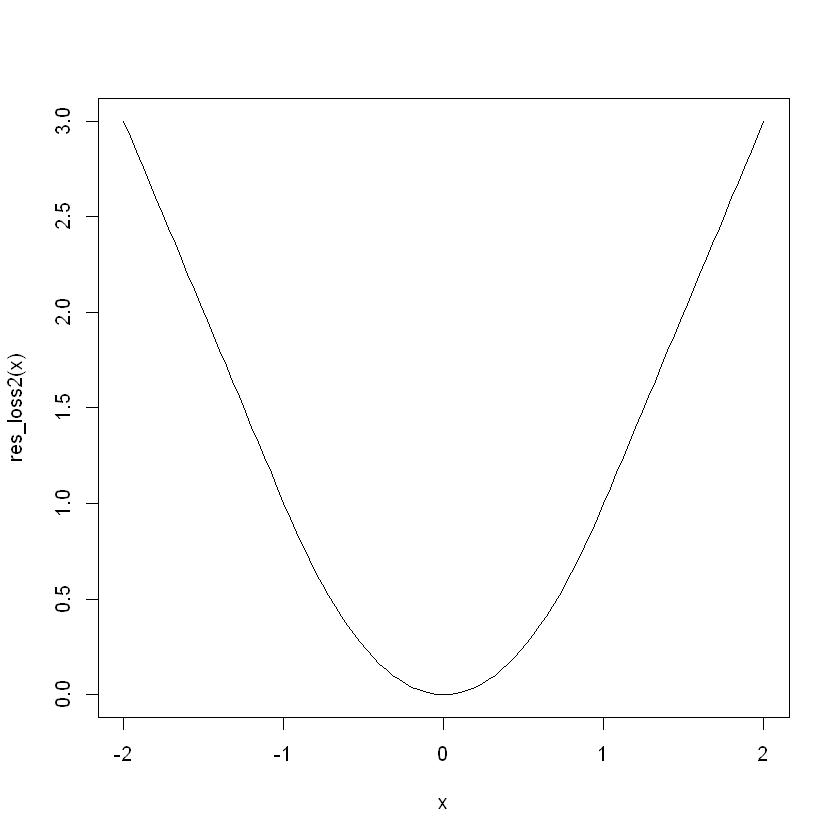

In [10]:
curve(res_loss2, from = -2, to = 2)

# The R Environment
• The global environment (or the workspace) in R consists of the collection of your named objects.

• When you start an R session, a new environment is initialized (unless you load a saved environment).

• When a function is called, a new local environment is created within the body of the function.

## Clearing the Global Environment
Note the code rm(list=ls()) clears the R global environment.

## The Function Environment
• Each function has its own (internal) environment.

• Names in the function environment override names from the global environment.

• Assignments in the internal environment don’t change the global environment.

• Functions search for named variables (undefined in the function itself) in the environment in which the function was created (in our case, the global environment).

In [11]:
x <- 7
y <- c("dog", "cat")

addition <- function(y){
    x <- x + y
    return(x)
}

addition(1)
x
y

[1] 8

[1] 7

[1] "dog" "cat"

In [12]:
circle.area <- function(r){
    print(pi)
    return(pi*r^2)
}
circle.area(1:3)

[1] 3.141593


[1]  3.141593 12.566371 28.274334

In [13]:
circle.area <- function(r){
    print(pi)
    return(pi*r^2)
}
true.pi <- pi # Save the real value
pi <- 3 # Assign a new value

circle.area(1:3)

[1] 3


[1]  3 12 27

In [14]:
pi <- true.pi # Restore the real value
circle.area(1:3)

[1] 3.141593


[1]  3.141593 12.566371 28.274334

## Use Your Function Interfaces
The function interfaces are the places where the function interacts with the global environment: at the inputs and the outputs.

• Interact with the rest of the system only at the interfaces:

        • Arguments should give your function all the information it needs
        • Reduces the risk of bugs
        • Exception would be universal constants like pi.
        
• Output should be only through return().


# Extended Example: Fitting a Model

We study the following idea: bigger cities tend to produce more economically per capita.

## Geoffrey West et al.
A proposed statistical model for this relationship:

$$
Y = \beta_{0}X^{\beta_{1}}+\epsilon
$$

where:

• Y: per-capita "gross metropolitan product" of a city

• X: is the population of the city

• $\beta_{0}, \beta_{1}$: parameters

• $\epsilon$: noise

In [15]:
gmp <- read.table("gmp.txt", as.is = TRUE, header = TRUE)
head(gmp)

city,gmp,pcgmp
"Abilene, TX",3.8870e+09,24490
"Akron, OH",2.2998e+10,32889
"Albany, GA",3.9550e+09,24269
"Albany-Schenectady-Troy, NY",3.1321e+10,36836
"Albuquerque, NM",3.0727e+10,37657
"Alexandria, LA",3.8790e+09,25494


### Variables
• city

• gmp: gross metropolitan product (money the city makes)

• pcgmp: per-capita gross metropolitan product (money the city makes divided by the number of people in the city)

gmp衡量了城市生产产品的总价值，pcgmp衡量了城市人均生产产品的价值，因此我们可以得到各城市的总人口

In [16]:
gmp$pop <- gmp$gmp / gmp$pcgmp
head(gmp)

city,gmp,pcgmp,pop
"Abilene, TX",3.8870e+09,24490,158717.8
"Akron, OH",2.2998e+10,32889,699261.2
"Albany, GA",3.9550e+09,24269,162965.1
"Albany-Schenectady-Troy, NY",3.1321e+10,36836,850282.3
"Albuquerque, NM",3.0727e+10,37657,815970.5
"Alexandria, LA",3.8790e+09,25494,152153.4


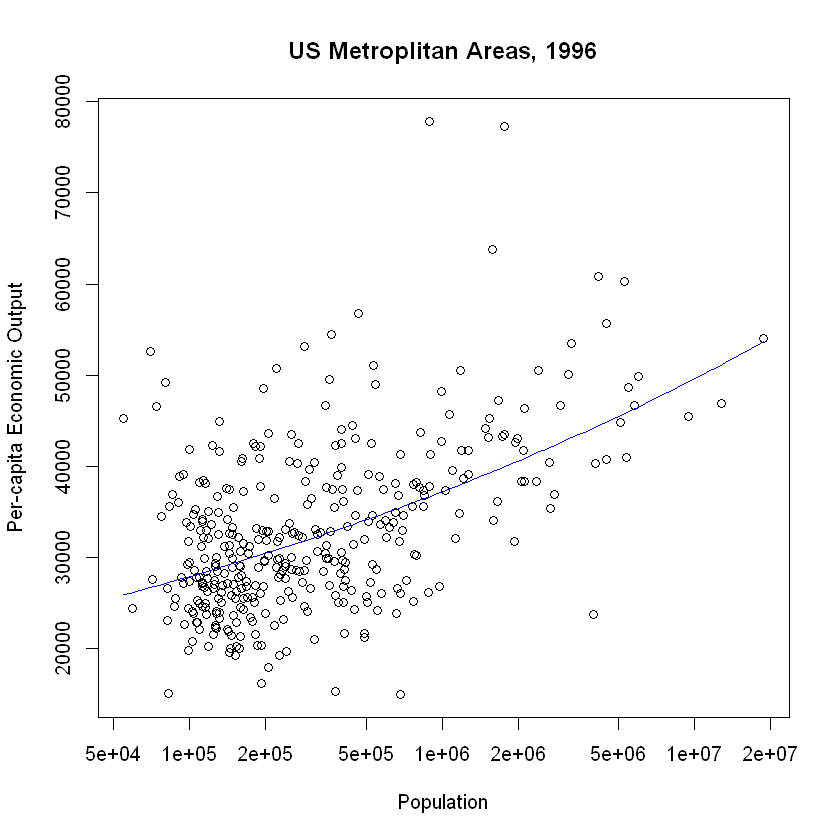

In [17]:
# Plotting Per-Capita GMP vs. Population

# log参数，控制是否对横轴或者纵轴取对数，log = "x"表示对x轴取对数，log = "y"表示对y轴
# 取对数，log = "xy" 表示对x轴y轴同时取对数。
plot(gmp$pop, gmp$pcgmp, log = "x", xlab = "Population",
     ylab = "Per-capita Economic Output", main = "US Metroplitan Areas, 1996")

# beta_0 = 6611; beta_1 = 1/8
# add参数，控制是否在原图上添加曲线，默认为FALSE
curve(6611*x^{1/8}, add = TRUE, col = "blue")

## Fitting the Function
Want to fit the model:
$$
Y = 6611X^{\beta_{1}}+\epsilon
$$

We are assuming $\beta_{0}$= 6611 and trying to estimate $\beta_{1}$ using the data.

By least square estimation process, I conclude the general solution to $\hat{\beta_{0}}, \hat{\beta_{1}}$:

$$
\begin{align}
\frac{\partial{f(\beta_{0}, \beta_{1})}}{\partial{\beta_{1}}} = 0 \Rightarrow \sum\limits^{n}_{i=1}x_{i}^{\beta_{1}}y_{i}\ln{x_{i}} &= \beta_{0}\sum\limits^{n}_{i=1}x_{i}^{2\beta_{1}}\ln{x_{i}}\\
\frac{\partial{f(\beta_{0}, \beta_{1})}}{\partial{\beta_{0}}} = 0 \Rightarrow \sum\limits^{n}_{i=1}x_{i}^{\beta_{1}}y_{i} &= \beta_{0}\sum\limits^{n}_{i=1}x_{i}^{2\beta_{1}}
\end{align}
$$

Hence, we have:
$$
\nabla{f(\beta_{0}, \beta_{1})} = \left(\sum\limits^{n}_{i=1}x_{i}^{\beta_{1}}y_{i} - \beta_{0}\sum\limits^{n}_{i=1}x_{i}^{2\beta_{1}}, \sum\limits^{n}_{i=1}x_{i}^{\beta_{1}}y_{i}\ln{x_{i}} - \beta_{0}\sum\limits^{n}_{i=1}x_{i}^{2\beta_{1}}\ln{x_{i}}\right)
$$

In this case, we assume $\beta_{0} = 6611$, however, this equation system cannot be solved directly.

## Strategy

$$
\mathop{min}\limits_{\beta}\sum\limits^{n}_{i=1}(y_{i}-6611x_{i}^{\beta})^2
$$

### Note this is the training mean square error (times n).

# Optimizing a Function (Numerical Methods for Optimization)

## Gradient Descent Method (Steepest Descent Method)
Methematically, if we want to move towards the minimum of a function, we need to get the direction with steepest descent, which is the opposite direction of gradient $\nabla{f}$. This method can take us step by step to the minimum.

Let $f: C \subset \mathbb{R}_{n} \rightarrow \mathbb{R}$ be a real function with continuous derivatives. Denote the gradient:
$$
\nabla{f} = (\frac{\partial{f}}{\partial{x_{1}}}, \frac{\partial{f}}{\partial{x_{2}}},..., \frac{\partial{f}}{\partial{x_{n}}})
$$

In order to approach minimum we have to move towards: $-\nabla{f(\mathop{x}\limits^{\rightarrow})}$, or simply:

$$
S_{0}(\mathop{x}\limits^{\rightarrow}) = \frac{-\nabla{f}(\mathop{x}\limits^{\rightarrow})}{\Vert{\nabla{f}(\mathop{x}\limits^{\rightarrow})\Vert}}
$$

where: 
$$
\Vert{\nabla{f}(\mathop{x}\limits^{\rightarrow})}\Vert = \sqrt{\left(\frac{\partial{f}}{\partial{x_{1}}}\right)^{2}+ \left(\frac{\partial{f}}{\partial{x_{2}}}\right)^{2}+...+ \left(\frac{\partial{f}}{\partial{x_{n}}}\right)^{2}}
$$

So, let’s start from $\mathop{x_{0}}\limits^{\rightarrow}$, for some $\gamma > 0$, in the next iteration we update to $\mathop{x_{1}}\limits^{\rightarrow} = \mathop{x_{0}}\limits^{\rightarrow} + \gamma{S(\mathop{x_{0}}\limits^{\rightarrow})}$. This gives us a point which has moved towards $\nabla{f}$, therefore it takes $f$ closer to the minimum,
$$
f(\mathop{x_{0}}\limits^{\rightarrow}) > f(\mathop{x_{0}}\limits^{\rightarrow})
$$

Let $\mathop{x_{0}}\limits^{\rightarrow}$ be a point close to minimum, $\mathop{x_{k}}\limits^{\rightarrow}$ can be constructed iteratively as
follows.

## Algorithm for Gradient Descent Method
(1) Choose $x_{0} \in C$. Choose $\gamma > 0$. Choose a accuracy $\delta > 0$.

(2) Set 

$$
S(\mathop{x_{i}}\limits^{\rightarrow}) = \frac{-\nabla{f}(\mathop{x_{i}}\limits^{\rightarrow})}{\Vert{\nabla{f}(\mathop{x_{i}}\limits^{\rightarrow})\Vert}} = \frac{\left(\frac{\partial{f}}{\partial{x_{1}}}, \frac{\partial{f}}{\partial{x_{2}}},..., \frac{\partial{f}}{\partial{x_{n}}}\right)}{\sqrt{\left(\frac{\partial{f}}{\partial{x_{1}}}\right)^{2}+ \left(\frac{\partial{f}}{\partial{x_{2}}}\right)^{2}+...+ \left(\frac{\partial{f}}{\partial{x_{n}}}\right)^{2}}}
$$

$$
\mathop{x_{i+1}}\limits^{\rightarrow} = \mathop{x_{i}}\limits^{\rightarrow} + \gamma{S(\mathop{x_{i}}\limits^{\rightarrow})}
$$

(3) If $\Vert{\nabla{f}(\mathop{x_{i}}\limits^{\rightarrow})\Vert} < \delta$ (accuracy), then terminate the algorithm, let the approximate solution be $\mathop{x_{i+1}}\limits^{\rightarrow}$.

$\quad$If $\Vert{\nabla{f}(\mathop{x_{i}}\limits^{\rightarrow})\Vert} \geq \delta$, then go back to step (2).

Hence, we apply the Gradient Descent method to:

$$
\mathop{min}\limits_{\beta}: f(\beta) = \sum\limits^{n}_{i=1}(y_{i}-6611x_{i}^{\beta})^2
$$

In [18]:
accuracy <- 1
gamma <- 1e-15
beta_i <- 0.1

f_beta <- function(beta){
    return(sum((gmp$pcgmp - 6611*gmp$pop^beta)^2))
}

gradient <- function(beta){
    return(-13222*sum(log(gmp$pop)*(gmp$pcgmp - 6611*gmp$pop^beta)))
}

gradient(beta_i)

while(abs(gradient(beta_i)) >= accuracy){
    beta_i <- beta_i - gamma*gradient(beta_i)
}

c(beta_i, f_beta(beta_i))

[1] -5.85054e+11

[1] 1.262944e-01 2.263972e+10

## Lecture Note: First Attempt

In [19]:
# Parameters
max.iter <- 100 # How long we run the alg.
stop.deriv <- 1/100 # If derivative is small, stop
derivative.step <- 1/1000 # This is h
step.scale <- 1e-15 # This is c

# Initializations
iter <- 0 # Compare to max.iteration
deriv <- Inf # Compare to stop.deriv
beta <- 0.15

max.iter <- 100 # How long we run the alg.
stop.deriv <- 1/100 # If derivative is small, stop
deriv.step <- 1/1000 # This is h
step.scale <- 1e-15 # This is c
iter <- 0 # Iteration counter
deriv <- Inf
beta <- 0.15


while((iter < max.iter) & (deriv > stop.deriv)) {
    iter <- iter + 1
    sse.1 <- sum((gmp$pcgmp - 6611*gmp$pop^beta)^2)
    sse.2 <- sum((gmp$pcgmp - 6611*gmp$pop^(beta + deriv.step))^2)
    deriv <- (sse.2 - sse.1)/deriv.step
    beta <- beta - step.scale*deriv
    }

list(beta = beta, iteration = iter, converged = (iter < max.iter))

$beta
[1] 0.1258166

$iteration
[1] 100

$converged
[1] FALSE

### What’s Wrong With the Previous Attempt?
• Not encapsulated: Re-run by copying and pasting. Note easy to fit into bigger project.

• Inflexible: To edit initializations must copy, paste, re-run

• Error-prone: If you change the dataset, not sure if it would still work...

• Hard to fix: Should stop when absolute value of derivative is small.

## Lecture Note: First Fix

In [20]:
est.scaling.exponent <- function(beta) {
    max.iter <- 100 # How long we run the alg.
    stop.deriv <- 1/100 # If derivative is small, stop
    deriv.step <- 1/1000 # This is h
    step.scale <- 1e-15 # This is c
    iter <- 0
    deriv <- Inf
    while((iter < max.iter) & (abs(deriv) > stop.deriv)) {
        iter <- iter + 1
        sse.1 <- sum((gmp$pcgmp - 6611*gmp$pop^beta)^2)
        sse.2 <- sum((gmp$pcgmp
        - 6611*gmp$pop^(beta + deriv.step))^2)
        deriv <- (sse.2 - sse.1)/deriv.step
        beta <- beta - step.scale*deriv
    }
    fit <- list(beta = beta, iteration = iter,
    converged = (iter < max.iter))
    return(fit)
}

## Lecture Note: Second Fix
Problem: Have to rerun if we want to change defined parameters.

Solution: Let’s make them arguments (with default values) of the function.

In [21]:
est.scaling.exponent <- function(beta, beta_0 = 6611,
        max.iter = 100, stop.deriv = .01, deriv.step = .001, step.scale = 1e-15) {
    iter <- 0
    deriv <- Inf
    while((iter < max.iter) & (abs(deriv) > stop.deriv)) {
        iter <- iter + 1
        sse.1 <- sum((gmp$pcgmp - beta_0*gmp$pop^beta)^2)
        sse.2 <- sum((gmp$pcgmp
        - beta_0*gmp$pop^(beta + deriv.step))^2)
        deriv <- (sse.2 - sse.1)/deriv.step
        beta <- beta - step.scale*deriv
    }
    fit <- list(beta = beta, iteration = iter,
    converged = (iter < max.iter))
    return(fit)
}

## Lecture Note: Third Fix
Problem: Don’t need to write out the SSE calculations twice in the body of the function.

Solution: Write a SSE() function.

In [22]:
est.scaling.exponent <- function(beta, beta_0 = 6611,
        max.iter = 100, stop.deriv = .01, deriv.step = .001, step.scale =1e-15) {
    iter <- 0
    deriv <- Inf

    sse <- function(b) {sum((gmp$pcgmp - beta_0*gmp$pop^b)^2)}

    while((iter < max.iter) & (abs(deriv) > stop.deriv)) {
        iter <- iter + 1
        deriv <- (sse(beta + deriv.step) - sse(beta))/deriv.step
        beta <- beta - step.scale*deriv
    }
    fit <- list(beta = beta, iteration = iter,
    converged = (iter < max.iter))
    return(fit)
}

## Fourth Fix
Problem: Locked into using specific columns of gmp: if we want to use a different data set, have to rewrite the function.

Solution: Make them arguments.

In [23]:
est.scaling.exponent <- function(beta, beta_0 = 6611,response = gmp$pcgmp, 
                    predictor = gmp$pop, max.iter = 100, stop.deriv = .01, 
                    deriv.step = .001, step.scale =1e-15) {

    iter <- 0
    deriv <- Inf

    sse <- function(b) {sum((response - beta_0*predictor^b)^2)}

    while((iter < max.iter) & (abs(deriv) > stop.deriv)){
        iter <- iter + 1
        deriv <- (sse(beta + deriv.step) - sse(beta))/deriv.step
        beta <- beta - step.scale*deriv
    }
    fit <- list(beta = beta, iteration = iter,
    converged = (iter < max.iter))
    return(fit)
}

In [24]:
est.scaling.exponent <- function(beta, beta_0 = 6611,response = gmp$pcgmp,
                        predictor = gmp$pop, max.iter = 100, stop.deriv = .01,
                        deriv.step = .001, step.scale =1e-15){
    iter <- 0
    deriv <- Inf

    sse <- function(b) {sum((response - beta_0*predictor^b)^2)}

    for (i in 1:max.iter) {
        iter <- iter + 1
        deriv <- (sse(beta + deriv.step) - sse(beta))/deriv.step
        beta <- beta - step.scale*deriv
        if (abs(deriv) < stop.deriv) {break()}
    }
    fit <- list(beta = beta, iteration = iter, converged = (iter < max.iter))
    return(fit)
}

# Exercise
• Run the code with the default values to get an estimate of $\beta$. Plot the curve with the data points to check out the fit.

• Randomly remove one data point – how much does the estimate change?

• Exercise: Run the code from different starting points – how much does the estimate change?

In [25]:
# 略

# Assessing Model Accuracy (Optional)

Let’s recall the grocery store example from Lecture 2 on multiple linear regression. How do we know if the model we selected is a good fit?

### Example
A large national grocery retailer tracks productivity and costs of its facilities closely. Consider a data set obtained from a single distribution center for a one-year period. Each data point for each variable represents one week of activity. The variables included are number of cases shipped in thousands ($X_{1}$), the indirect costs of labor as a percentage of total costs ($X_{2}$), a qualitative predictor called holiday that is coded 1 if the week has a holiday and 0 otherwise ($X_{3}$), and total labor hours (Y).

In [26]:
Grocery <- read.table("Kutner_6_9.txt", header=T)
head(Grocery)
lm0 <- lm(Y ~ X1 + X2 + X3, data = Grocery)
lm0

Y,X1,X2,X3
4264,305.657,7.17,0
4496,328.476,6.20,0
4317,317.164,4.61,0
4292,366.745,7.02,0
4945,265.518,8.61,1
4325,301.995,6.88,0



Call:
lm(formula = Y ~ X1 + X2 + X3, data = Grocery)

Coefficients:
(Intercept)           X1           X2           X3  
  4149.8872       0.7871     -13.1660     623.5545  


问题：

• $X_{1}$的系数几乎为0，这是否依然可以作为模型的predictor？

• 假设我们拥有了新的信息，例如weather data，它是否应该被包括在模型中？

• 线性回归是否是最适合这组数据的预测模型？

## Quality of Fit
To evaluate the performance of a method on a given data set, we need to measure how well its predictions match the observed data.

• Linear regression uses Mean Squared Error (MSE):

$$
\frac{1}{n-p}\sum\limits^{n}_{i=1}(Y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1}X_{i1}-...-\hat{\beta}_{p}X_{ip})^2
$$

Called the $\textbf{training MSE}$ since it's calculated on the training data.

• But what we actually want to minimize is the test MSE:

$$
\mathbb{E}\left[(Y_{test}-\hat{\beta}_{0}-\hat{\beta}_{1}X_{test,1}-...-\hat{\beta}_{p}X_{test,p})^{2}\right]
$$

Using $\textbf{test}$ data that was not used to fit the model.

We are interested in the accuracy of the predictions that we obtain when we apply our method to previously unseen test data.

## The Test MSE

How do we minimize the test MSE?

• Sometimes have a test dataset (that wasn't used to train the model.)

• What if no test data is available?
    
    • Idea: Use the model with the lowest training MSE.
    • Unfortunately, no guarantee that the method with the lowest training MSE will
    also have the lowest test MSE.
    
• This week we'll learn a strategy for estimating the test MSE when no test data is available: $\textbf{Cross-validation}$.

# Classification
• We studied linear regression for use when we want to predict a quantitative response variable.

• The study of predicting categorical response variables is called classification.

## Examples
• 一个人的症状反映出他可能患上的三种疾病之一。

• 一家银行必须根据用户的IP地址、交易历史等判断一笔线上交易是否是欺诈的。

• 生物学家通过使用患病与未患病的人的DNA数据确定致病的DNA突变。

## Many Methods of Classification:
• Logistic Regression.

• Linear Discriminant Analysis.

• K Nearest Neighbors.

• Trees and Random Forests.

• Support Vector Machines

## Set-up
• Just as in regression, we have a set of training observations (data):
$(X_{1}, Y_{1}),(X_{2}, Y_{2}), . . . ,(X_{n}, Y_{n})$, where $Y_{1}, Y_{2},..., Y_{n}$ are categorical.

• Use the data to build the classifier.

• We want our classifier to perform well not only on the training data, but also on test observations that were not used to build the classifier.

## Assessing the Accuracy

For linear regression we calculated to training mean squared error ($\textbf{training MSE}$):

$$
\frac{1}{n}\sum\limits^{n}_{i=1}(Y_{i}-\hat{\beta}_{0}-\hat{\beta}_{1}X_{i1}-...-\hat{\beta}_{p}X_{ip})^2
$$

*Here we just use $\frac{1}{n}$ for simplicity.

For Classification, we use the $\textbf{error rate}$:

$$
\frac{1}{n}\sum\limits^{n}_{i=1}\mathbf{I}\left[Y_{i}\neq \hat{Y}_{i}\right]
$$

* $\hat{Y}_{i}$is the predicted classification for the $i^{th}$ observation.
* $\mathbf{I}\left[Y_{i}\neq \hat{Y}_{i}\right]$ is an indicator variable that equals 1 if $Y_{i}\neq \hat{Y}_{i}$, and 0 if $Y_{i} = \hat{Y}_{i}$.
* If $\mathbf{I}\left[Y_{i}\neq \hat{Y}_{i}\right] = 0$, then the $i^{th}$ observation was classified correctly.
* The $\textbf{error rate}$ computed the proportion of incorrect classifications.

• Similarly to the regression case, the following is referred to as the $\textbf{training}$ error rate:
$$
\frac{1}{n}\sum\limits^{n}_{i=1}\mathbf{I}\left[Y_{i}\neq \hat{Y}_{i}\right]
$$

•  The $\textbf{test}$ error rate associated with a set of test observations $(X_{test}, Y_{test})$ is given by:

$$
\mathbb{E}\left[\mathbf{I}\left[Y_{test} \neq \hat{Y}_{test}\right]\right]
$$

• A good classifier is one for which the $\textbf{test error rate is smallest}$.

## Bayes Classifier

• The best classifier (in terms of test error) assigns each observation to the most likely class, given its predictor values.

• Assign test observation with predictor vector $X_{test}$ to the class j for which:
$$
\mathbb{P}\left(Y=j | X = X_{test}\right)
$$
is largest.

• There is a conditional probability, recall the Bayes rule that:
$$
\mathbb{P}\left(A|B\right) = \frac{\mathbb{P}\left(A\cap B\right)}{\mathbb{P}\left(B\right)}
$$

Consider a two-class case, which means that $Y_{test}$ is either in class A or class B, the Bayes classifier predicts:


$$ \left\{
\begin{aligned}
&\mbox{Class A}\qquad \mbox{if }\mathbb{P}\left(Y=A|X=X_{test}\right)\\
&\mbox{Class B}\qquad \mbox{otherwise}
\end{aligned}
\right.
$$

## K Nearest Neighbors (KNN)

In theory would like to always use the Bayes classifier. In practice, we do not know $\mathbb{P}\left(Y|X\right)$.

• Estimates $\mathbb{P}\left(Y|X\right)$ and then classifies observations to the class with highest estimated probability.

• Given a positive integer K and a test observation $X_{test}$:

* Identify K points in training data closest to $X_{test}$. Label $\mathcal{N}_{test}$.

* Estimate conditional probability for class j as fraction of points in $\mathcal{Ntest}$ whose response values equal j:

$$
\mathbb{P}\left(Y=j|X=X_{test}\right) = \frac{1}{K}\sum\limits_{i\in \mathcal{N}_{test}}\mathbf{I}\left(Y_{i}=j\right)
$$

在training dataset中确定一个test observation $X_{test}$，根据$X_{test}$确定距离其最近的K个点，将K个点构成的点集成为$\mathcal{N}_{test}$。给定test observation为$X_{test}$，分别计算$X_{test}$分别属于类别j的概率，这个概率等于刚刚求得的最近K个点狄拉克函数（是否属于类别j）的平均值，即：$\frac{1}{K}\sum\limits_{i\in \mathcal{N}_{test}}\mathbf{I}\left(Y_{i}=j\right)$。

• Classify the test observation to class with the largest probability.

## Example (Stock Market Movement)
Variables

* Year: The year that the observation was recorded.
* LagX: Percentage return X days ago.
* Volume: Volume of shares traded (number of daily shares traded in billions).
* Today: Percentage return for today.
* Direction: A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day.

In [27]:
library("ISLR")
head(Smarket, 3)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down


In [28]:
mean(Smarket$Lag1[Smarket$Direction == "Up"])
mean(Smarket$Lag1[Smarket$Direction == "Down"])

[1] -0.03969136

[1] 0.05068605

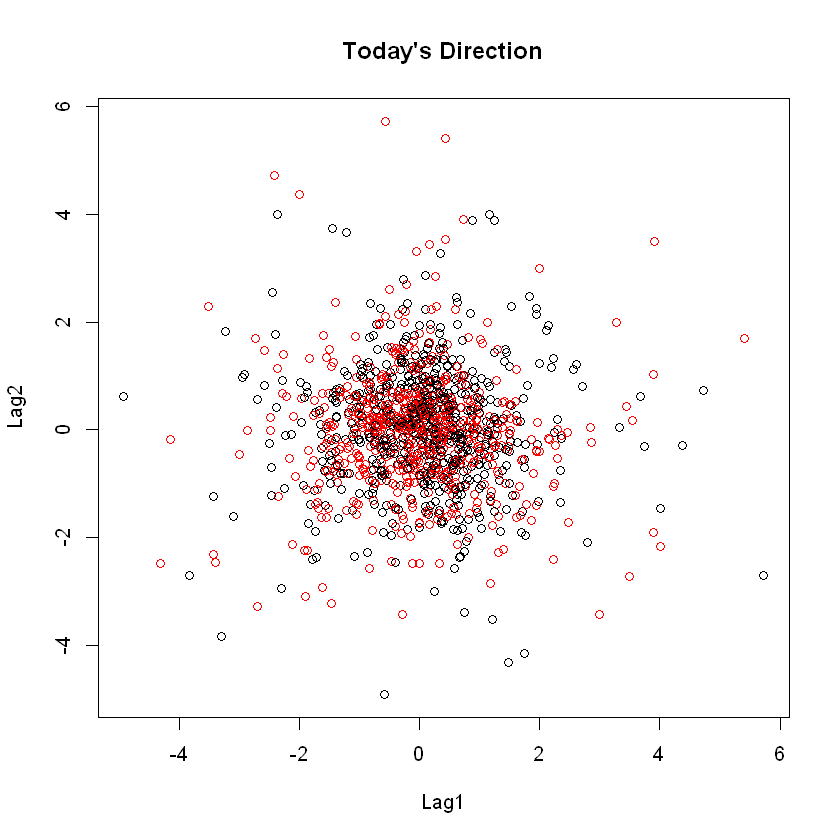

In [29]:
plot(Smarket$Lag1, Smarket$Lag2, col=Smarket$Direction, xlab = "Lag1", 
     ylab = "Lag2", main = "Today's Direction")

### Procedure
For a new point $\left(\mbox{Lag1}_{new}, \mbox{Lag2}_{new}\right)$:

• Calculate the Euclidean distance between the new point and all data points. For a data point $\left(\mbox{L}_{1}, \mbox{L}_{2}\right)$:
$$
\mbox{dist}^{2} = \left(\mbox{Lag1}_{new} − \mbox{L}_{1}\right)^{2} + \left(\mbox{Lag2}_{new} − \mbox{L}_{2}\right)^{2}
$$

• Create the set $\mathcal{N}_{new}$ containing the K closest points.

• Determine the number of ‘UPs’ and ‘DOWNs’ in $\mathcal{N}_{new}$ and classify the new point.

In [30]:
K <- 5
Lag1.new <- 2
Lag2.new <- 4.25
# K = 5 and new point (2, 4.25).

dists <- sqrt((Smarket$Lag1 - Lag1.new)^2 + (Smarket$Lag2 - Lag2.new)^2)
neighbors <- order(dists)[1:K] # order()函数进行升序排序并返回序号
neighb.dir <- Smarket$Direction[neighbors]
choice <- names(which.max(table(neighb.dir)))
choice

[1] "Down"

### Task
Write a function called KNN.decision that returns the class decision for any new point $\left(\mbox{Lag1}_{new}, \mbox{Lag2}_{new}\right)$ and any choice of K (with K = 5) as default.

In [31]:
KNN.decision <- function(Lag1.new, Lag2.new, K = 5, Lag1 = Smarket$Lag1, 
                         Lag2 = Smarket$Lag2){
    n <- length(Lag1)
    stopifnot(length(Lag2) == n, length(Lag1.new) == 1, 
              length(Lag2.new) == 1, K <= n)
    dists = (Lag1-Lag1.new)^2 + (Lag2-Lag2.new)^2
    neighbors = order(dists)[1:K]
    neighbors.dir = Smarket$Direction[neighbors]
    return(names(which.max(table(neighbors.dir))))
}

### Testing Our Model

Let’s build our model using data from 2001 - 2004 and use the 2005 data as a test. Can we predict market direction better than a random guess?

In [32]:
train <- Smarket[Smarket$Year != 2005,]
test <- Smarket[Smarket$Year == 2005,]

predict <- rep(NULL, dim(test)[1])
for(i in 1:dim(test)[1]){
    predict[i] <- KNN.decision(Lag1.new = test$Lag1[i], Lag2.new = test$Lag2[i],
                                K = 5, Lag1 = train$Lag1, Lag2 = train$Lag2)
}

test.error <- sum(test$Direction != predict)/length(predict)
test.error

[1] 0.515873

In [33]:
# Use different value of K and see if we can get better predictions than random guesses.

train <- Smarket[Smarket$Year != 2005,]
test <- Smarket[Smarket$Year == 2005,]

predict <- rep(NULL, dim(test)[1])
for(i in 1:dim(test)[1]){
    predict[i] <- KNN.decision(Lag1.new = test$Lag1[i], Lag2.new = test$Lag2[i],
                                K = 7, Lag1 = train$Lag1, Lag2 = train$Lag2)
}

test.error <- sum(test$Direction != predict)/length(predict)
test.error

[1] 0.5357143

可以发现K的值会影响test.error，因此通过多个K值，可以画出K值-test.error关系图：

In [34]:
iter <- function(start=1, end=100){
    K <- start:end
    test.error <- rep(NULL, length(K))
    for(i in K){
        predict.set <- rep(NULL, dim(test)[1])
        for(j in 1:dim(test)[1]){
            predict.set[j] <- KNN.decision(Lag1.new = test$Lag1[j], 
                        Lag2.new = test$Lag2[j],K = i, Lag1 = train$Lag1, 
                        Lag2 = train$Lag2)
        }
        test.error[i] <- sum(test$Direction != predict.set)/length(predict)
    }
    return(test.error)
}

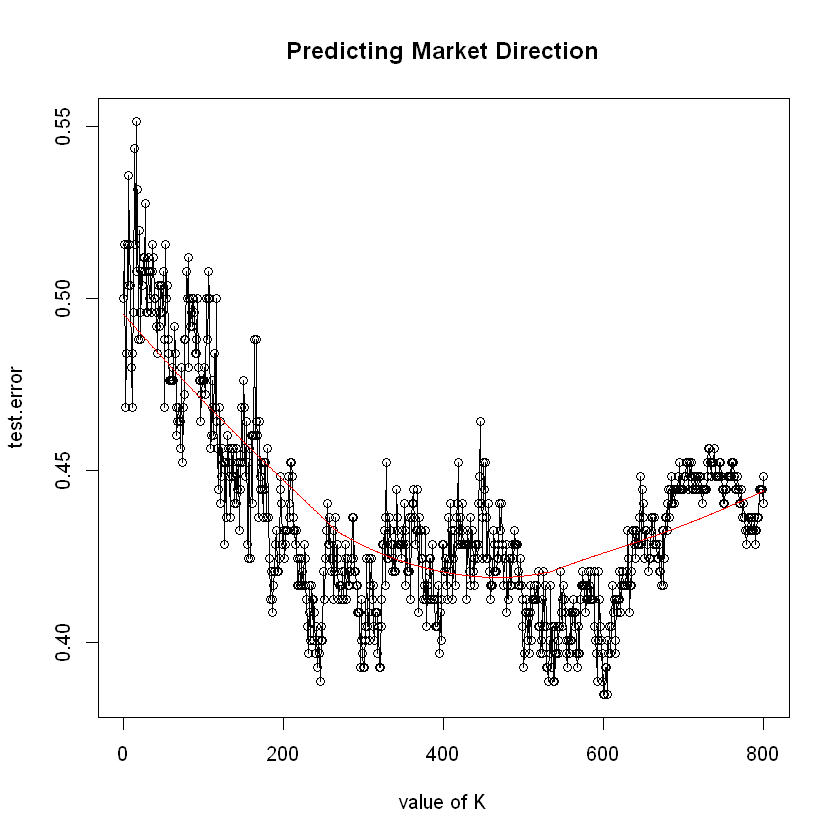

In [35]:
test.error.set1 <- iter(start = 1, end = 800)
plot(1:800, test.error.set1, type = "o", xlab = "value of K", 
     ylab = "test.error", main = "Predicting Market Direction")
lines(lowess(1:800, test.error.set1), col = "red")